In [1]:
import random
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib_inline.backend_inline import set_matplotlib_formats
from sklearn.decomposition import LatentDirichletAllocation, NMF, PCA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from wordcloud import WordCloud

from database import load_data

set_matplotlib_formats("retina")

In [2]:
data = load_data()

INFO:database:Loading data: /Users/romain/Documents/dev/presidentielle-2022-programmes/data.db


In [3]:
names = data["name"]

name_tokens = list(set(re.split(" |-", " ".join(names).lower())))
stop_words = [
    "000", "001", "044", "063", "093", "00139", "00296voi",
    "la", "le", "les", "ce", "ma",
    "je", "il", "elle", "nous", "vous", "ils", "elles",
    "ai", "ont", "est", "etre", "ete", "sera", "serai", "seront", "suis", "sont",
    "nos", "notre", "votre", "sa", "son",
    "de", "du", "des", "et", "en", "un", "une", "ans", "au", "aux", "se", "me", "ne", "ni", "ou",
    "qu", "que", "qui", "rai",
    "pas", "par", "pour", "dans", "dont", "sur", "avec", "contre", "mais", "plus", "jusqu",
    "france", "francais",
    *name_tokens,
]

vectorizer = TfidfVectorizer(strip_accents="unicode", lowercase=True, stop_words=stop_words)
vec_program = vectorizer.fit_transform(data["program_text"])
vec_feature_names = vectorizer.get_feature_names_out()

In [4]:
freqs = pd.DataFrame(vec_program.toarray(), columns=vec_feature_names)
word_clouds = [
    (
        data.iloc[i]["name"],
        WordCloud(width=800, height=400, random_state=0).generate_from_frequencies(freqs.iloc[i]),
    )
    for i in range(len(data.index))
]

In [5]:
neighbors = NearestNeighbors(n_neighbors=4).fit(vec_program.toarray())
distances, indices = neighbors.kneighbors(vec_program.toarray())

names = data["name"]
nearest_neighbors = np.array(
    [
        [names[ind[0]], names[ind[1]], names[ind[2]], names[ind[3]]]
        for ind in indices
    ]
)

In [6]:
nmf = NMF(n_components=5, init="nndsvda").fit(vec_program.toarray())

# 🗳️ Natural Language of Politics

> Romain Clement, 2022

Analyse des programmes des candidats à la présidentielle 2022 sous l'angle du traitement du langage naturel (NLP)

# 🎯 Objectifs

- Vision objective
- Eléments différenciants
- Affinités politiques

**... bonne excuse pour de la data, de l'IA et du NLP !**

# 🎲 Jouons un peu !

Connaissez-vous bien les programmes des candidats à l'élection présidentielle 2022 ?

Mettons à l'épreuve vos connaissances !

![Candidats](static/candidats.jpg)

# 🙈 Qui est-ce ?

Devinez à quel candidat appartiennent ces programmes !

In [7]:
# sample_word_clouds = random.sample(word_clouds, 3)
sample_word_clouds = [word_clouds[0], word_clouds[3], word_clouds[11]]

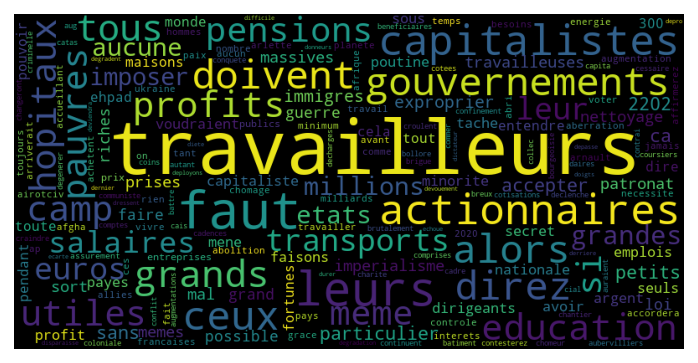

In [8]:
_ = plt.imshow(sample_word_clouds[0][1])
_ = plt.axis("off")

In [9]:
print(sample_word_clouds[0][0])

Madame Nathalie ARTHAUD


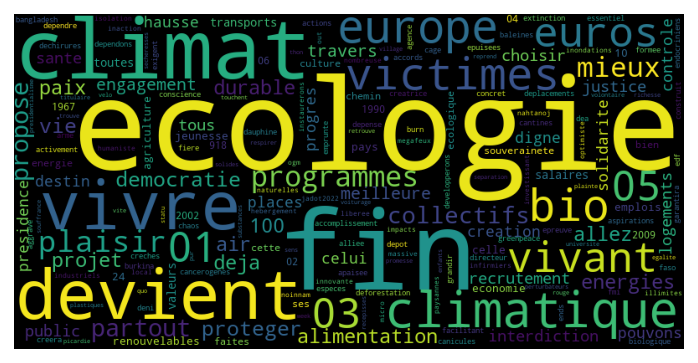

In [10]:
_ = plt.imshow(sample_word_clouds[1][1])
_ = plt.axis("off")

In [11]:
print(sample_word_clouds[1][0])

Monsieur Yannick JADOT


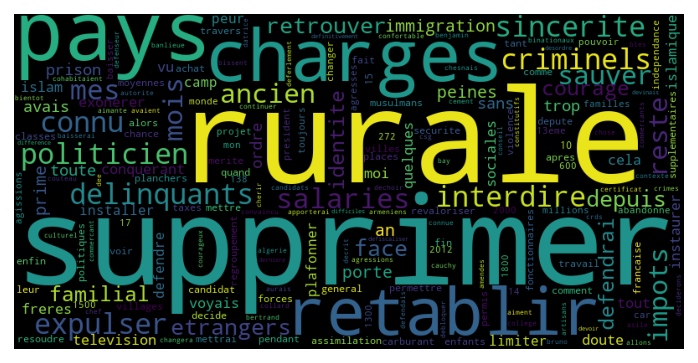

In [12]:
_ = plt.imshow(sample_word_clouds[2][1])
_ = plt.axis("off")

In [13]:
print(sample_word_clouds[2][0])

Monsieur Eric ZEMMOUR


# 🧑‍🤝‍🧑 Et plus si affinités

Quels sont les 3 "voisins" les plus proches de chaque candidat ?

In [14]:
voisins = pd.DataFrame(nearest_neighbors, columns=["Candidat", "Voisin 1", "Voisin 2", "Voisin 3"])
sample_voisins = voisins.sample(3)

In [15]:
print("Candidat :", sample_voisins.iloc[0]["Candidat"])

Candidat : Madame Valerie PECRESSE


In [16]:
print("Voisin 1 :", sample_voisins.iloc[0]["Voisin 1"])

Voisin 1 : Madame Anne HIDALGO


In [17]:
print("Voisin 2 :", sample_voisins.iloc[0]["Voisin 2"])

Voisin 2 : Monsieur Eric ZEMMOUR


In [18]:
print("Voisin 3 :", sample_voisins.iloc[0]["Voisin 3"])

Voisin 3 : Monsieur Fabien ROUSSEL


In [19]:
print("Candidat :", sample_voisins.iloc[1]["Candidat"])

Candidat : Monsieur Philippe POUTOU


In [20]:
print("Voisin 1 :", sample_voisins.iloc[1]["Voisin 1"])

Voisin 1 : Monsieur Fabien ROUSSEL


In [21]:
print("Voisin 2 :", sample_voisins.iloc[1]["Voisin 2"])

Voisin 2 : Madame Nathalie ARTHAUD


In [22]:
print("Voisin 3 :", sample_voisins.iloc[1]["Voisin 3"])

Voisin 3 : Monsieur Jean-Luc MELENCHON


In [23]:
print("Candidat :", sample_voisins.iloc[2]["Candidat"])

Candidat : Monsieur Fabien ROUSSEL


In [24]:
print("Voisin 1 :", sample_voisins.iloc[2]["Voisin 1"])

Voisin 1 : Madame Anne HIDALGO


In [25]:
print("Voisin 2 :", sample_voisins.iloc[2]["Voisin 2"])

Voisin 2 : Monsieur Yannick JADOT


In [26]:
print("Voisin 3 :", sample_voisins.iloc[2]["Voisin 3"])

Voisin 3 : Monsieur Jean-Luc MELENCHON


In [27]:
voisins.iloc[:6]

,Candidat,Voisin 1,Voisin 2,Voisin 3
0,Madame Nathalie ARTHAUD,Monsieur Philippe POUTOU,Monsieur Fabien ROUSSEL,Madame Anne HIDALGO
1,Monsieur Nicolas DUPONT-AIGNAN,Monsieur Eric ZEMMOUR,Madame Valerie PECRESSE,Madame Anne HIDALGO
2,Madame Anne HIDALGO,Monsieur Fabien ROUSSEL,Monsieur Jean-Luc MELENCHON,Monsieur Yannick JADOT
3,Monsieur Yannick JADOT,Monsieur Fabien ROUSSEL,Madame Anne HIDALGO,Madame Valerie PECRESSE
4,Monsieur Jean LASSALLE,Madame Anne HIDALGO,Madame Valerie PECRESSE,Monsieur Fabien ROUSSEL
5,Madame Marine LE PEN,Monsieur Eric ZEMMOUR,Madame Anne HIDALGO,Madame Valerie PECRESSE


In [28]:
voisins.iloc[6:]

,Candidat,Voisin 1,Voisin 2,Voisin 3
6,Monsieur Emmanuel MACRON,Madame Anne HIDALGO,Madame Valerie PECRESSE,Monsieur Fabien ROUSSEL
7,Monsieur Jean-Luc MELENCHON,Madame Anne HIDALGO,Monsieur Fabien ROUSSEL,Monsieur Philippe POUTOU
8,Madame Valerie PECRESSE,Madame Anne HIDALGO,Monsieur Eric ZEMMOUR,Monsieur Fabien ROUSSEL
9,Monsieur Philippe POUTOU,Monsieur Fabien ROUSSEL,Madame Nathalie ARTHAUD,Monsieur Jean-Luc MELENCHON
10,Monsieur Fabien ROUSSEL,Madame Anne HIDALGO,Monsieur Yannick JADOT,Monsieur Jean-Luc MELENCHON
11,Monsieur Eric ZEMMOUR,Madame Valerie PECRESSE,Madame Marine LE PEN,Madame Anne HIDALGO


# 💡 Thématiques

Quels sont les principaux thèmes de cette campagne ?

## 5 thèmes principaux

In [29]:
theme_names = ["?" for i in range(nmf.n_components)]
themes = pd.DataFrame(
    [
        vec_feature_names[np.argpartition(nmf.components_[i], -5)[-5:]]
        for i in range(nmf.n_components)
    ],
    columns=[f"Terme {i + 1}" for i in range(nmf.n_components)],
)
themes["Thematique"] = theme_names
themes

,Terme 1,Terme 2,Terme 3,Terme 4,Terme 5,Thematique
0,vivre,europe,climat,ecologie,euros,?
1,mes,veux,delinquants,pays,immigration,?
2,ceux,capitalistes,profits,voulons,travailleurs,?
3,europeenne,20,politique,liberons,suppression,?
4,frontieres,voterez,confance,faisant,pacte,?


**Peut-on les nommer ?**

In [30]:
themes["Thematique"][0] = "Ecologie"
themes

,Terme 1,Terme 2,Terme 3,Terme 4,Terme 5,Thematique
0,vivre,europe,climat,ecologie,euros,Ecologie
1,mes,veux,delinquants,pays,immigration,?
2,ceux,capitalistes,profits,voulons,travailleurs,?
3,europeenne,20,politique,liberons,suppression,?
4,frontieres,voterez,confance,faisant,pacte,?


In [31]:
themes["Thematique"][1] = "Sécurité"
themes

,Terme 1,Terme 2,Terme 3,Terme 4,Terme 5,Thematique
0,vivre,europe,climat,ecologie,euros,Ecologie
1,mes,veux,delinquants,pays,immigration,Sécurité
2,ceux,capitalistes,profits,voulons,travailleurs,?
3,europeenne,20,politique,liberons,suppression,?
4,frontieres,voterez,confance,faisant,pacte,?


In [32]:
themes["Thematique"][2] = "Economie"
themes

,Terme 1,Terme 2,Terme 3,Terme 4,Terme 5,Thematique
0,vivre,europe,climat,ecologie,euros,Ecologie
1,mes,veux,delinquants,pays,immigration,Sécurité
2,ceux,capitalistes,profits,voulons,travailleurs,Economie
3,europeenne,20,politique,liberons,suppression,?
4,frontieres,voterez,confance,faisant,pacte,?


In [33]:
themes["Thematique"][3] = "Europe"
themes

,Terme 1,Terme 2,Terme 3,Terme 4,Terme 5,Thematique
0,vivre,europe,climat,ecologie,euros,Ecologie
1,mes,veux,delinquants,pays,immigration,Sécurité
2,ceux,capitalistes,profits,voulons,travailleurs,Economie
3,europeenne,20,politique,liberons,suppression,Europe
4,frontieres,voterez,confance,faisant,pacte,?


In [34]:
themes["Thematique"][4] = "Institution (?)"
themes

,Terme 1,Terme 2,Terme 3,Terme 4,Terme 5,Thematique
0,vivre,europe,climat,ecologie,euros,Ecologie
1,mes,veux,delinquants,pays,immigration,Sécurité
2,ceux,capitalistes,profits,voulons,travailleurs,Economie
3,europeenne,20,politique,liberons,suppression,Europe
4,frontieres,voterez,confance,faisant,pacte,Institution (?)


# ⚙️ Pipeline

Comment automatiser l'analyse des programmes des candidats ?

## Etapes

1. Extraction de données : _web-scraping_, _extraction texte_, _SQLite_
2. Vectorisation du corpus : _TF-IDF_
3. Analyses textuelles : _k-NN_, _NMF_

## Shéma Global

![Pipeline](static/pipeline.png)

## Améliorations

- Corrections orthographiques
- Lemmatisation

# 🙋 Questions

Merci pour votre attention ! Questions ?

Ressources :

- Dépôt GitHub : https://github.com/rclement/presidentielle-2022-nlp
- Programmes candidats : https://programme-candidats.interieur.gouv.fr
- Elections Tracker de Magic LEMP : https://www.elections-tracker.fr
- From Comments to Concepts: Text Analysis for Political Social Media Content (Paul Nulty) : https://www.youtube.com/watch?v=ww2RgDUwT-M

# ✉️ Contact

**Romain Clement**<br>
Data | IA | Formation<br>
https://romain-clement.net<br>

![Business Card](https://business-card-generator.vercel.app/vcard.svg?card_type=vcard&firstname=Romain&lastname=Clement&company=Freelance&job=Data+%7C+AI+%7C+Trainer&website=https%3A%2F%2Fromain-clement.net&email=contact%2Btalk%40romain-clement.net&city=Grenoble&country=France)

_Scan this QR code to add my vCard to your contacts!_